In [71]:
#Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [72]:
#PROBLEM 5

In [45]:
# Parameters for the three univariate Gaussians
means = [2, 1, 0]
variances = [0.2, 0.5, 2]

In [46]:
# Generate x values
x = np.linspace(-3, 4, 1000)

In [47]:
# Calculate the PDF for each Gaussian
pdfs = []
for mu, sigma2 in zip(means, variances):
    pdf = 1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-(x - mu)**2 / (2 * sigma2))
    pdfs.append(pdf)

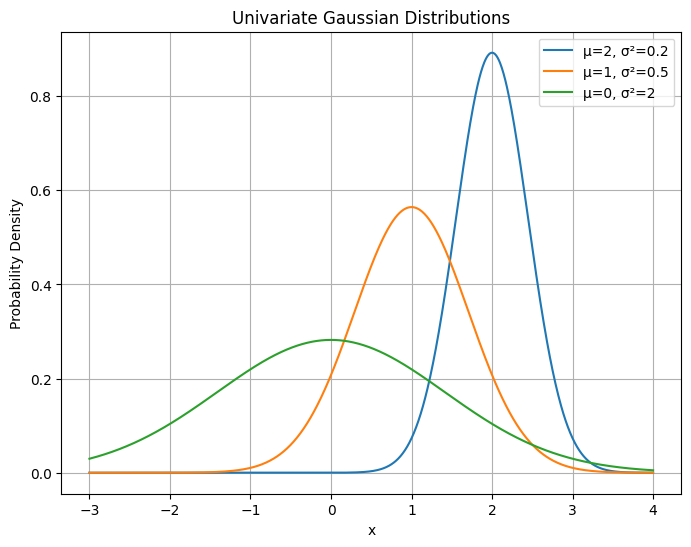

In [48]:
# Plot the Gaussians
plt.figure(figsize=(8, 6))
for i, mu in enumerate(means):
    plt.plot(x, pdfs[i], label=f"μ={mu}, σ²={variances[i]}")

plt.title("Univariate Gaussian Distributions")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


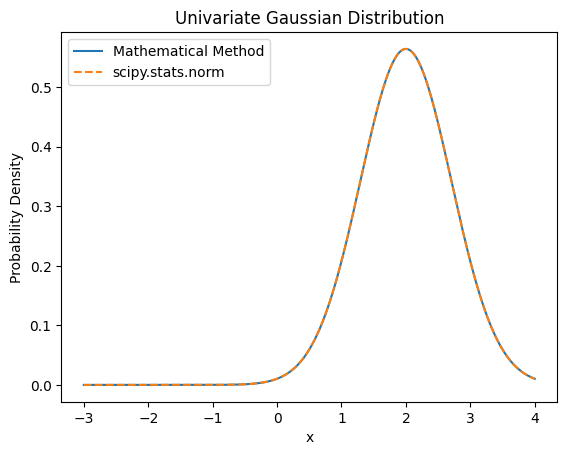

In [58]:
import scipy.stats as stats

# Parameters
mean = 2
variance = 0.5
x = np.linspace(-3, 4, 1000)  # Range for x-axis

# Mathematical method (formula implementation)
def univariate_gaussian(x, mu, sigma2):
  return (1 / np.sqrt(2 * np.pi * sigma2)) * np.exp(-(x - mu)**2 / (2 * sigma2))

# Calculate PDF using mathematical method
pdf_math = univariate_gaussian(x, mean, variance)

# Built-in method using scipy.stats.norm
pdf_scipy = stats.norm.pdf(x, mean, np.sqrt(variance))

# Plot the PDFs for comparison
plt.plot(x, pdf_math, label="Mathematical Method")
plt.plot(x, pdf_scipy, '--', label="scipy.stats.norm")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Univariate Gaussian Distribution")
plt.legend()
plt.show()


In [54]:
#B- #D plot
#  Parameters for the bivariate Gaussian
mean1, mean2 = 1, 0
sigma1, sigma2 = np.sqrt(0.5), np.sqrt(2)
rho = 0.8

In [55]:
# Generate grid of x1 and x2 values
x1, x2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

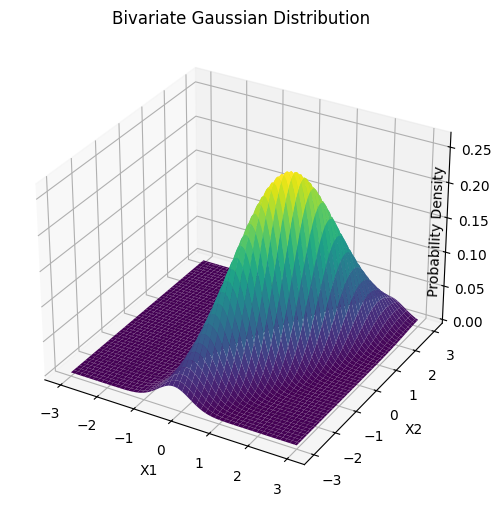

In [56]:
# Calculate the joint PDF
pdf_bivariate = (1 / (2 * np.pi * sigma1 * sigma2 * np.sqrt(1 - rho**2))) * \
    np.exp(-1 / (2 * (1 - rho**2)) * (((x1 - mean1)**2 / sigma1**2) -2 * rho * ((x1 - mean1) * (x2 - mean2)) / 
    (sigma1 * sigma2) +((x2 - mean2)**2 / sigma2**2)))

# Create 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, pdf_bivariate, cmap='viridis')
ax.set_title("Bivariate Gaussian Distribution")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Probability Density", labelpad=-25)  # Adjust padding as needed
plt.show()


In [64]:
#PROBLEM 6

In [65]:
# Define the range of y values for the integration
y_values = np.linspace(-10, 10, 1000)

In [67]:
# Define a function for the marginal distribution of x
def marginal_pdf(x, mean1, mean2, sigma1, sigma2, rho):
    # This function will be integrated over y
    def integrand(y):
        return (1 / (2 * np.pi * sigma1 * sigma2 * np.sqrt(1 - rho**2))) * \
            np.exp(-1 / (2 * (1 - rho**2)) * (((x - mean1)**2 / sigma1**2) -
                2 * rho * ((x - mean1) * (y - mean2)) / (sigma1 * sigma2) +((y - mean2)**2 / sigma2**2)))
    
    # Use trapezoidal rule for numerical integration to calculate the marginal pdf
    y_step = y_values[1] - y_values[0]
    marginal_pdf_value = y_step * (0.5*integrand(y_values[0]) + 0.5*integrand(y_values[-1]) + sum(integrand(y_values[1:-1])))
    
    return marginal_pdf_value

In [68]:
# Calculate the marginal PDF for each x-value
x_values = np.linspace(-3, 3, 100)
marginal_pdf_values = [marginal_pdf(x, mu1, mu2, sigma1, sigma2, rho) for x in x_values]

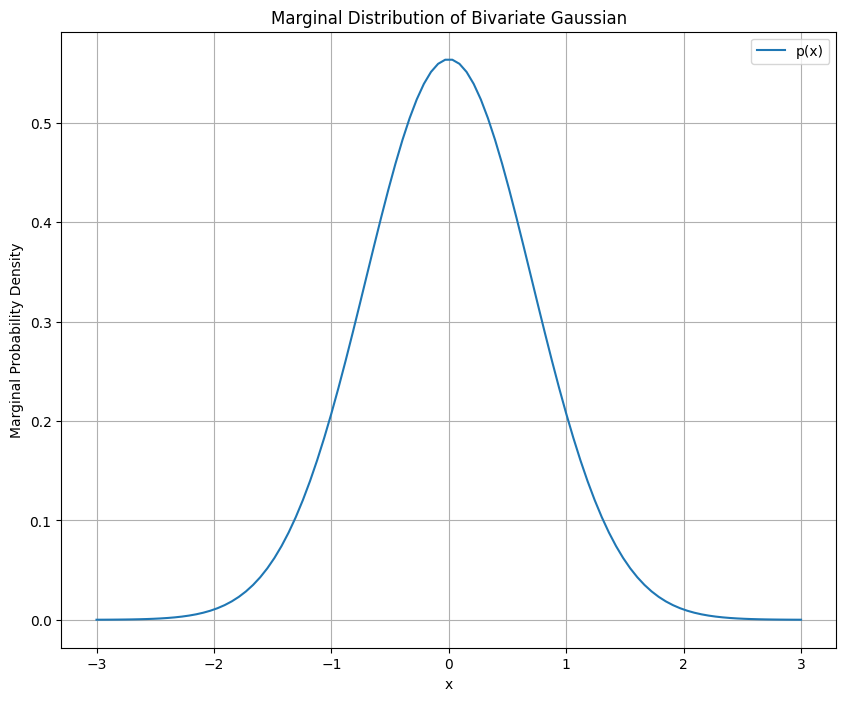

In [69]:
# Plot the marginal PDF
plt.figure(figsize=(10, 8))
plt.plot(x_values, marginal_pdf_values, label="p(x)")
plt.xlabel("x")
plt.ylabel("Marginal Probability Density")
plt.title("Marginal Distribution of Bivariate Gaussian")
plt.legend()
plt.grid(True)
plt.show()


In [70]:
# PROBLEM 7

In [59]:
# Define the parameters of the bivariate Gaussian
mean_x, mean_y = 0, 0
sigma_x, sigma_y = np.sqrt(0.5), np.sqrt(2)
rho = 0.8


In [60]:

# Define the conditional mean and standard deviation
mean_x_given_y = mean_x + rho * sigma_x / sigma_y * (2.0 - mean_y)
sigma_x_given_y = sigma_x * np.sqrt(1 - rho**2)

In [61]:
# Define the range of x values
x_values = np.linspace(-3, 3, 1000)

In [62]:
# Calculate the conditional PDF
p_x_given_y = 1 / (np.sqrt(2 * np.pi) * sigma_x_given_y) * np.exp(-(x_values - mean_x_given_y)**2 / (2 * sigma_x_given_y**2))

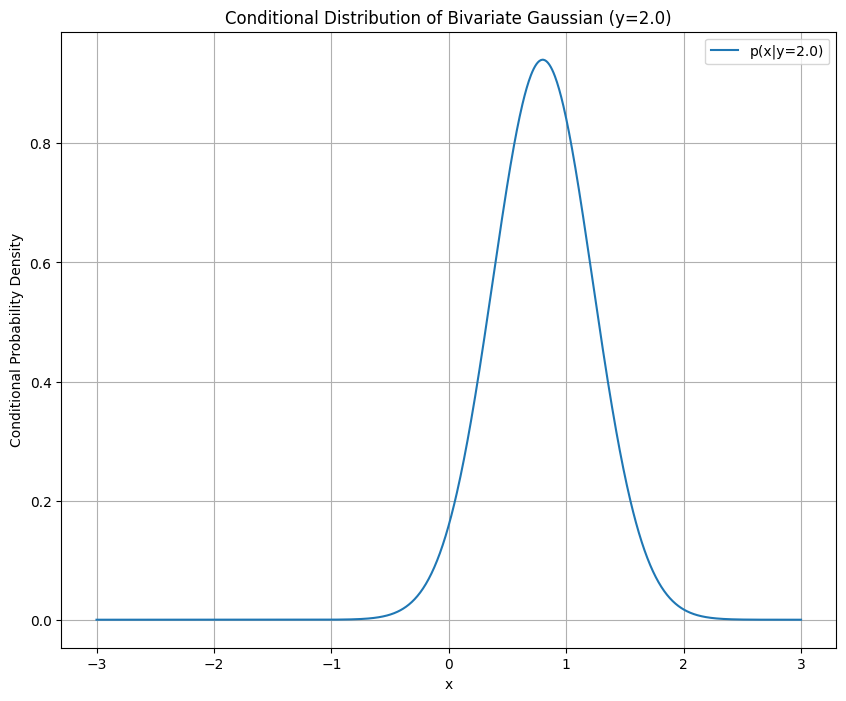

In [63]:
# Plot the conditional PDF
plt.figure(figsize=(10, 8))
plt.plot(x_values, p_x_given_y, label="p(x|y=2.0)")
plt.xlabel("x")
plt.ylabel("Conditional Probability Density")
plt.title("Conditional Distribution of Bivariate Gaussian (y=2.0)")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
#PROBLEM 8

# Load the image data from the text file
image_data = np.loadtxt('tiger.txt')

In [40]:
# Open the file and read the lines
with open('tiger.txt', 'r') as f:
    for i, line in enumerate(f):
        print(f"Line {i}: {line}")

Line 0:    2.3680650e-01   2.1786198e-01   2.4086604e-01   2.7740189e-01   2.7198917e-01   3.3829499e-01   3.2341001e-01   2.6792963e-01   2.5169147e-01   2.0838972e-01   2.0433018e-01   2.2327470e-01   2.2868742e-01   1.9215156e-01   1.4614344e-01   1.6238160e-01   1.8267930e-01   2.0838972e-01   2.2192152e-01   2.1921516e-01   2.0838972e-01   2.5439783e-01   2.4357240e-01   2.1650880e-01   1.3802436e-01   1.1366712e-01   1.1637348e-01   1.4479026e-01   2.0027064e-01   2.5710419e-01   2.5033829e-01   2.2733424e-01   2.1921516e-01   2.2192152e-01   1.8944520e-01   2.2056834e-01   2.0433018e-01   2.2733424e-01   2.0974290e-01   2.0297700e-01   1.8538566e-01   1.9215156e-01   2.2192152e-01   2.0703654e-01   1.9350474e-01   2.1515562e-01   1.8267930e-01   2.3951286e-01   3.1258457e-01   2.6116373e-01   2.1650880e-01   2.1244926e-01   1.9079838e-01   1.5426252e-01   1.5967524e-01   1.3937754e-01   1.2178620e-01   1.5290934e-01   2.0027064e-01   1.8267930e-01   1.9621110e-01   2.4221922e-01

In [41]:
# Split each line into values and convert them to floats
matrix = [[float(x) for x in line.split()] for line in lines]

# Convert the list to a numpy array
image_data = np.array(matrix)


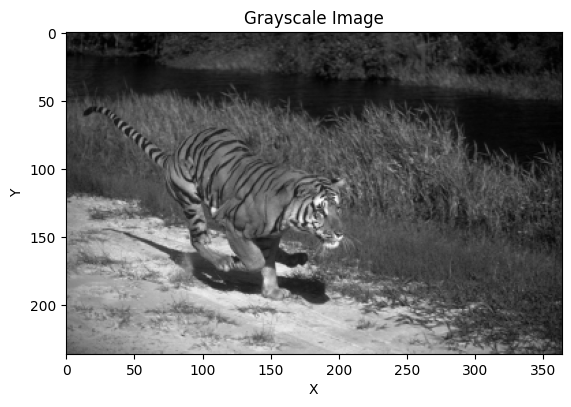

In [42]:
# A- Display the matrix as a grayscale image, and put the image into your report.  
plt.imshow(image_data, cmap='gray')
plt.title('Grayscale Image')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

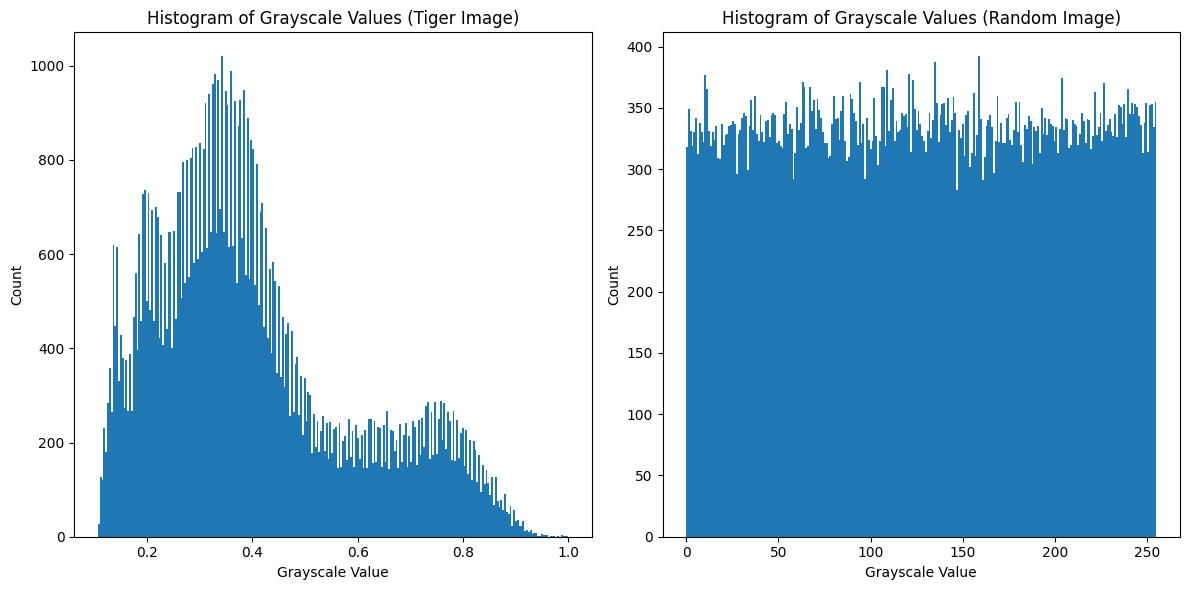

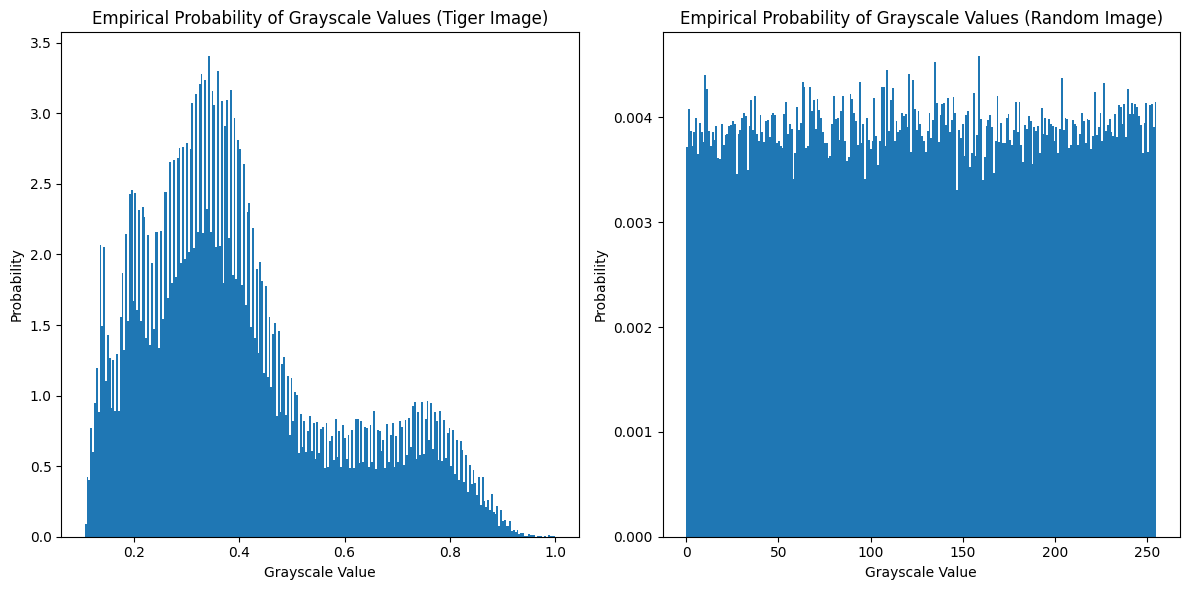

In [43]:
# B- Histogram and Emperical probability 
# Flatten the image data to a 1D array
flat_data = image_data.flatten()
flat_random_data = random_image.flatten()

# Create histograms of the grayscale values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(flat_data, bins=256)
plt.title('Histogram of Grayscale Values (Tiger Image)')
plt.xlabel('Grayscale Value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(flat_random_data, bins=256)
plt.title('Histogram of Grayscale Values (Random Image)')
plt.xlabel('Grayscale Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Create empirical probability plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(flat_data, bins=256, density=True)
plt.title('Empirical Probability of Grayscale Values (Tiger Image)')
plt.xlabel('Grayscale Value')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.hist(flat_random_data, bins=256, density=True)
plt.title('Empirical Probability of Grayscale Values (Random Image)')
plt.xlabel('Grayscale Value')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()


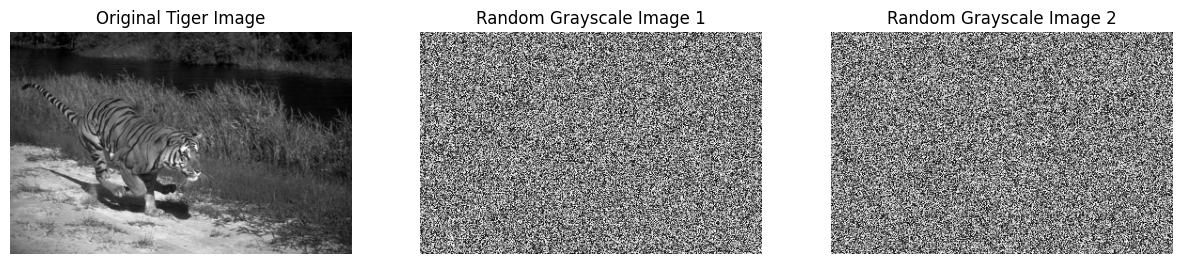

In [44]:
# C- Random Samples 
# Set the size of the images
height = 236
width = 364

# Generate two random images
random_image = np.random.randint(0, 256, size=(height, width))
random_image1 = np.random.randint(0, 256, size=(height, width))

# Display the random images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Assuming 'image_data' contains the pixel data for the tiger image
axs[0].imshow(image_data, cmap='gray')
axs[0].set_title('Original Tiger Image')

axs[1].imshow(random_image, cmap='gray')
axs[1].set_title('Random Grayscale Image 1')

axs[2].imshow(random_image1, cmap='gray')
axs[2].set_title('Random Grayscale Image 2')

for ax in axs:
    ax.axis('off')

plt.show()